In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('flights.csv')
data

,DayofMonth,DayOfWeek,Carrier,OriginAirportID,DestAirportID,DepDelay,ArrDelay
0,19,5,DL,11433,13303,-3,1
1,19,5,DL,14869,12478,0,-8
2,19,5,DL,14057,14869,-4,-15
3,19,5,DL,15016,11433,28,24
4,19,5,DL,11193,12892,-6,-11
...,...,...,...,...,...,...,...
2702213,19,6,DL,13204,14869,1,-3
2702214,19,6,DL,10397,13495,-2,-3
2702215,19,6,DL,10140,10397,18,9
2702216,19,6,DL,10397,13244,10,7


# Flight Frequency by Day of Month and Day of Week

In [3]:
day_of_month_counts = data['DayofMonth'].value_counts().sort_index()

In [4]:
day_of_week_counts = data['DayOfWeek'].value_counts().sort_index()

In [5]:
day_of_month_colors = ['skyblue' for _ in day_of_month_counts.index]
day_of_week_colors = ['lightcoral' for _ in day_of_week_counts.index]

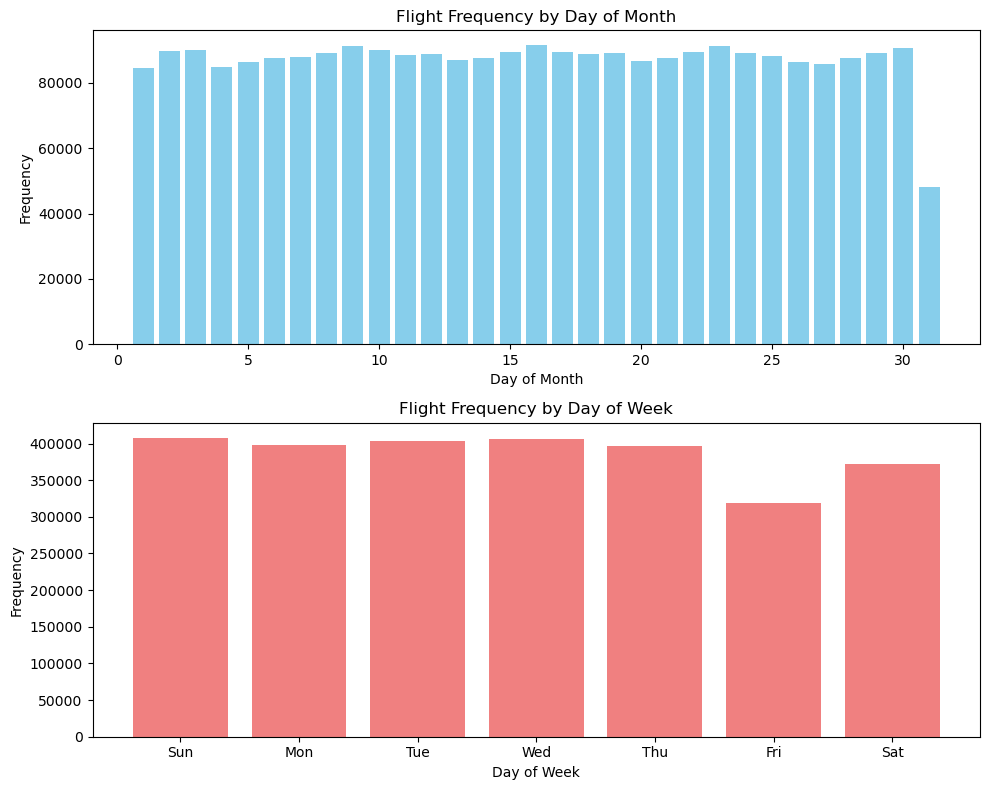

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
axes[0].bar(day_of_month_counts.index, day_of_month_counts.values, align='center',color=day_of_month_colors)
axes[0].set_title('Flight Frequency by Day of Month')
axes[0].set_xlabel('Day of Month')
axes[0].set_ylabel('Frequency')

day_names = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
axes[1].bar(day_names, day_of_week_counts.values, align='center',color=day_of_week_colors)
axes[1].set_title('Flight Frequency by Day of Week')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Heatmap 

In [7]:
data.corr

<bound method DataFrame.corr of          DayofMonth  DayOfWeek Carrier  OriginAirportID  DestAirportID  \
0                19          5      DL            11433          13303   
1                19          5      DL            14869          12478   
2                19          5      DL            14057          14869   
3                19          5      DL            15016          11433   
4                19          5      DL            11193          12892   
...             ...        ...     ...              ...            ...   
2702213          19          6      DL            13204          14869   
2702214          19          6      DL            10397          13495   
2702215          19          6      DL            10140          10397   
2702216          19          6      DL            10397          13244   
2702217          19          6      DL            10397          13487   

         DepDelay  ArrDelay  
0              -3         1  
1               0  

C:\Users\HP SSD\AppData\Local\Temp\ipykernel_2892\2112285433.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = data.corr()


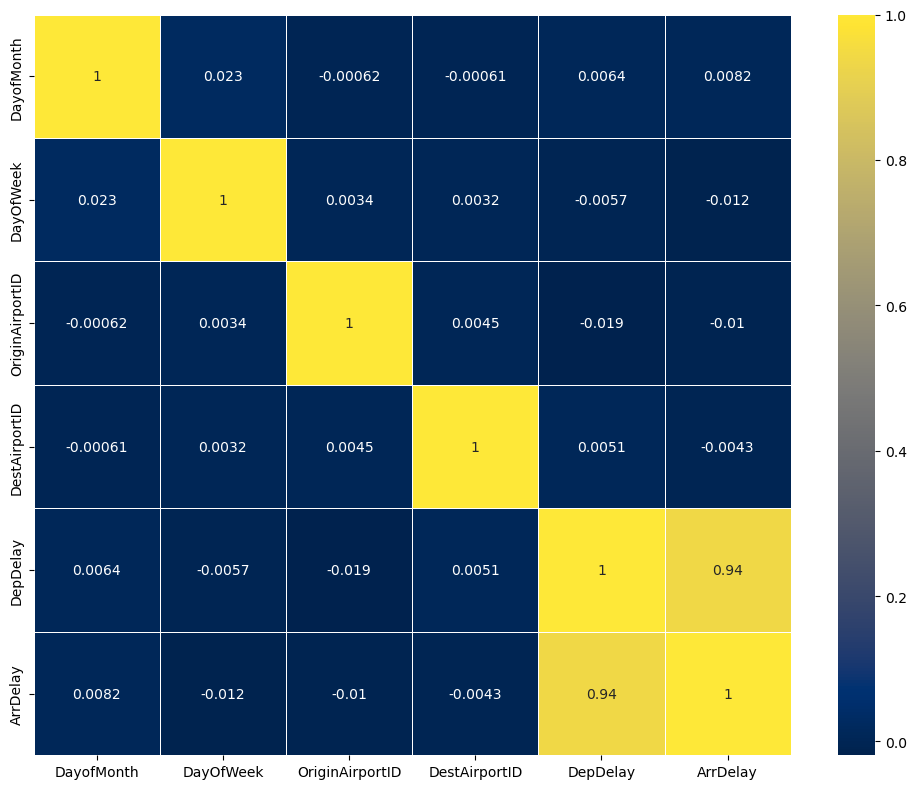

In [8]:
heatmap = data.corr()
plt.subplots(figsize=(10, 8))
sns.heatmap(heatmap, annot=True, cmap='cividis', linewidths=0.5)
plt.tight_layout()
plt.show()

# Pair Plot of DayofMonth, DepDelay, and ArrDelay

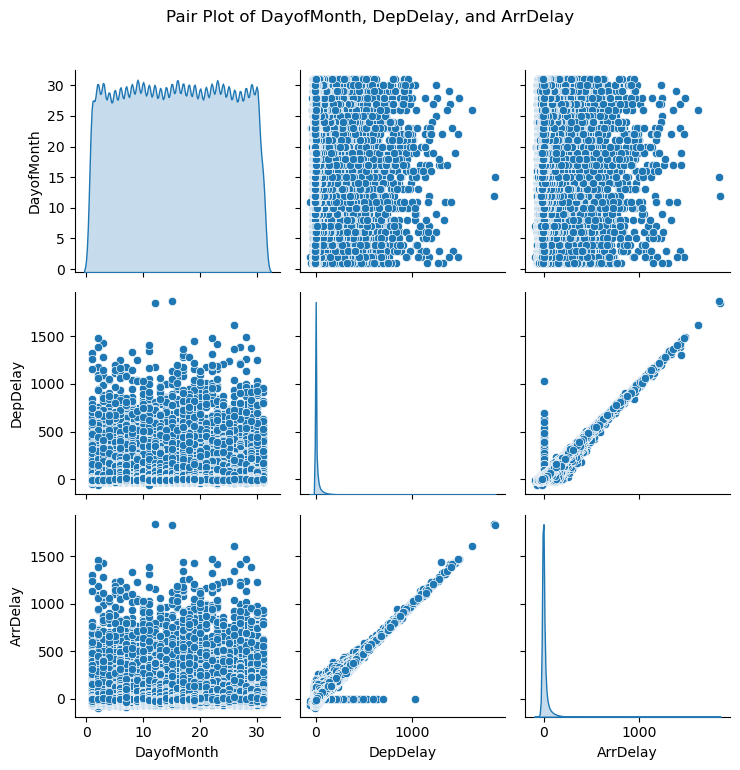

In [9]:
columns_for_pairplot = ['DayofMonth', 'DepDelay', 'ArrDelay']
sns.pairplot(data[columns_for_pairplot], diag_kind='kde', markers='o')
plt.suptitle('Pair Plot of DayofMonth, DepDelay, and ArrDelay', y=1.02)
plt.tight_layout()
plt.show()

# Violin Plot of Departure Delay by Carrier

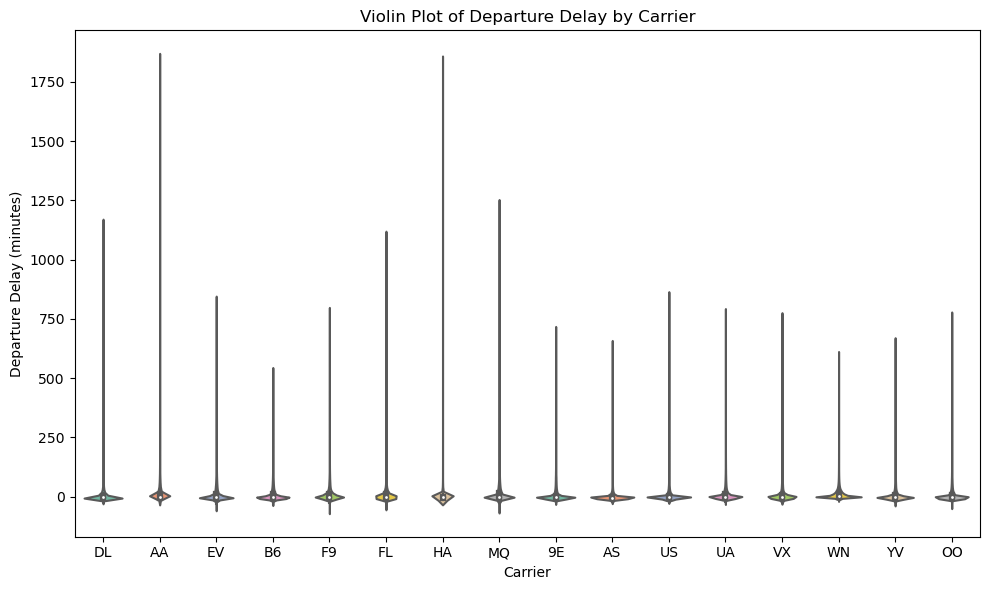

In [10]:
column1 = 'DepDelay'
column2 = 'Carrier'
plt.figure(figsize=(10, 6))
sns.violinplot(x=column2, y=column1, data=data, palette='Set2')
plt.xlabel('Carrier')
plt.ylabel('Departure Delay (minutes)')
plt.title('Violin Plot of Departure Delay by Carrier')
plt.tight_layout()
plt.show()

# Boxplot of Arrival Delay by Carrier

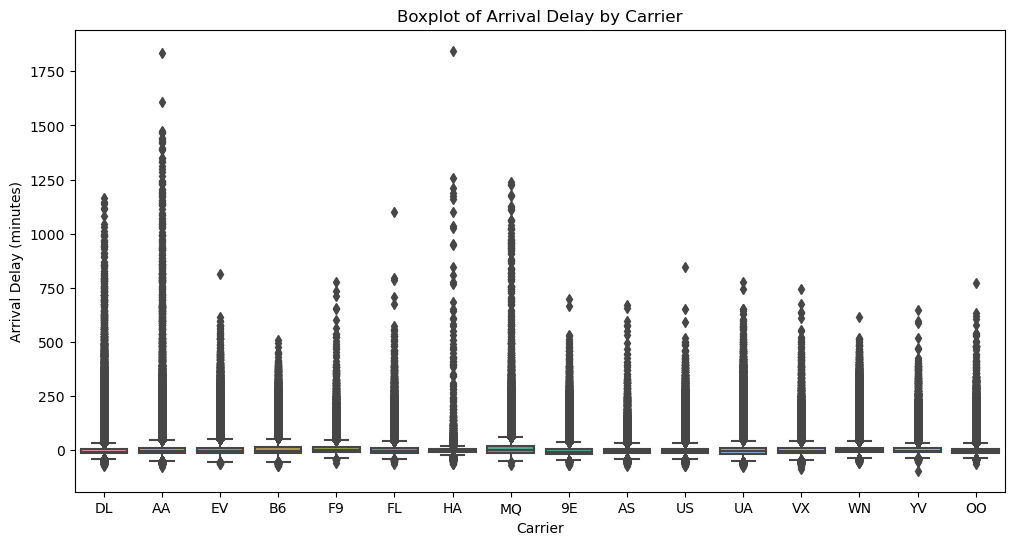

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Carrier', y='ArrDelay', data=data)
plt.title('Boxplot of Arrival Delay by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Arrival Delay (minutes)')
plt.show()